In [3]:
#Set notebook to work in offline
import plotly.offline as pyo
pyo.init_notebook_mode()

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<center>


    
## Networks 101 <br>
    
### _Prof. Dr. Tim Verdonck_ <br>
### _Thomas Servotte_  <br>
### _Statistical Data Science_ 
    
<img  align="center" src="logo.png" height=10% width=10%/>
</center>

## The Basics

<img  align="right" src="Images/complex_network.png" height=30% width=30%/>

1. Network = nodes + edges
2. Networks are everywhere
3. Some nodes are more important than others
4. Networks have structure
5. Things spread on networks

## Network = nodes + edges

<img  align="right" src="Images/edge_type.png" height=30% width=30%/>

- <span style="font-size:1.3em;"> Direction </span>

- <span style="font-size:1.3em;"> Weight </span>

- <span style="font-size:1.3em;">  Multiple types </span>

    - Multiplex - edges
    
    - Multipartite - nodes
    
<img  align="left" src="Images/multiplex.png" height=20% width=20%/>

## Affiliation networks: Bipartite graphs

<img  align="right" src="Images/affiliation1.png" height=30% width=30%/>
<img  align="right" src="Images/affiliation2.png" height=30% width=30%/>

- 2 types of nodes: members and groups
- Projection: extract one-mode projections of the two-mode affiliation
- E.g. Students in classes

## Let's create our first network

In [9]:
import networkx as nx

In [10]:
G = nx.Graph()
G.add_node('A')
G.add_node('B')

G.nodes()

NodeView(('A', 'B'))

In [11]:
G.add_edge('A', 'B')
G.edges()

EdgeView([('A', 'B')])

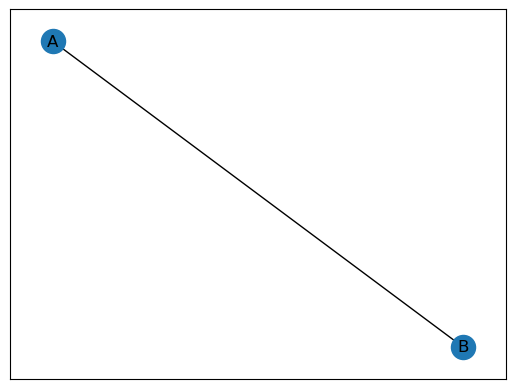

In [12]:
nx.draw_networkx(G)

## What about a multipartite network?

In [13]:
import itertools
import matplotlib.pyplot as plt

In [15]:
G = nx.Graph()
G.add_nodes_from(range(5), layer=1)
G.add_nodes_from(range(5, 10), layer=2)
G.add_nodes_from(range(10, 15), layer=3)

G.add_edges_from(itertools.product(range(5), range(5, 10)))
G.add_edges_from(itertools.product(range(5, 10), range(10, 15)))

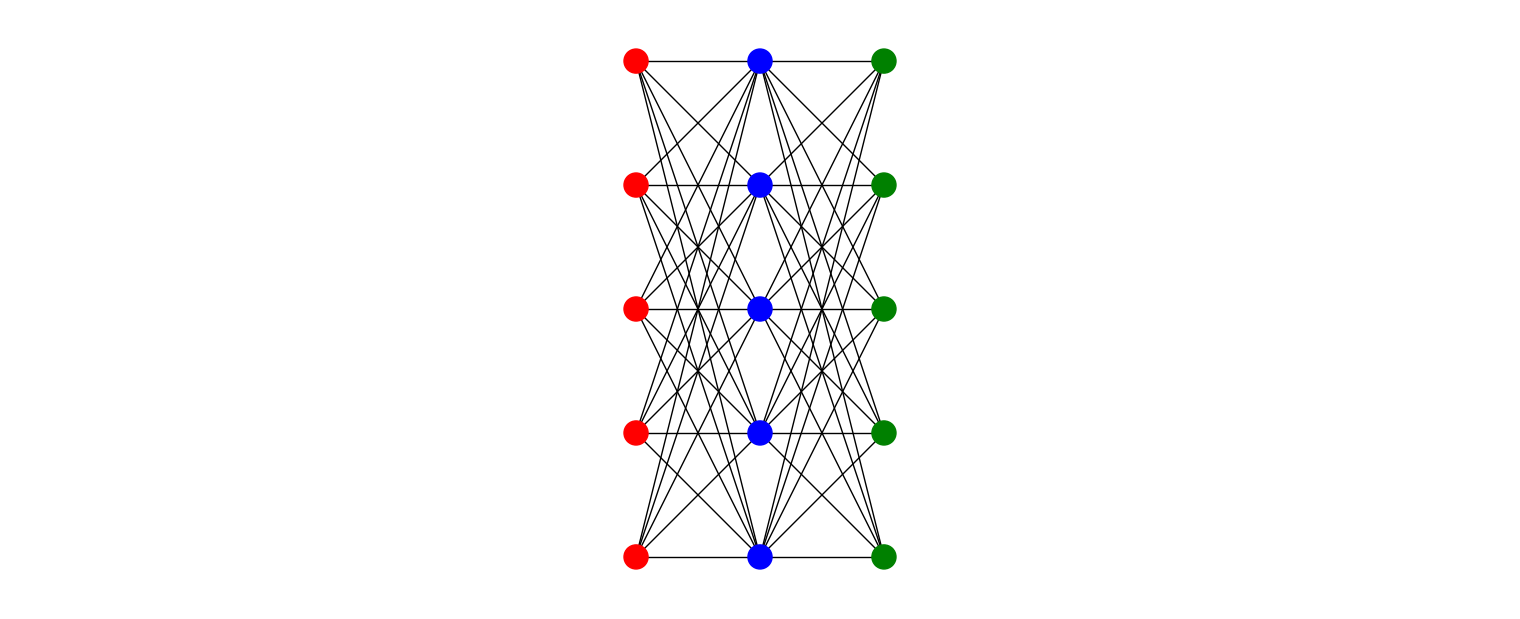

In [16]:
pos = nx.multipartite_layout(G, subset_key='layer')
plt.figure(figsize=(15, 6))
nx.draw(G, pos, node_color=['red']*5+['blue']*5+['green']*5, with_labels=False)
plt.axis("equal")
plt.show()

## Network = Representation of matrix

<img  align="center" src="Images/network_matrix_representation.png" height=80% width=80%/>

## An alternative way to define a network

In [17]:
import pandas as pd

In [19]:
node_names = ['A', 'B', 'C', 'D']
adjacency_matrix = pd.DataFrame([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
], columns=node_names, index=node_names)

adjacency_matrix

A  B  C  D
A  0  1  1  0
B  1  0  1  0
C  1  1  0  1
D  0  0  1  0

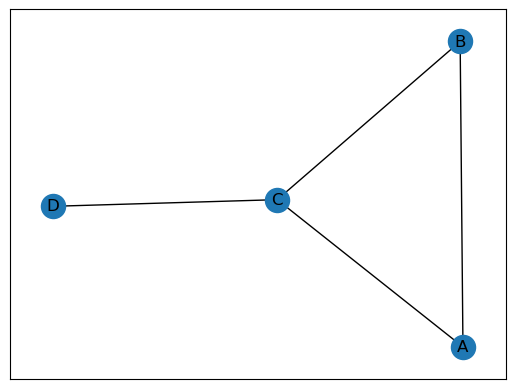

In [20]:
G = nx.from_pandas_adjacency(adjacency_matrix)
nx.draw_networkx(G)

## Or a directed graph

In [21]:
node_names = ['A', 'B', 'C', 'D']
adjacency_matrix = pd.DataFrame([
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 0, 1, 0]
], columns=node_names, index=node_names)

adjacency_matrix

A  B  C  D
A  0  1  1  0
B  0  0  1  0
C  1  0  0  1
D  0  0  1  0

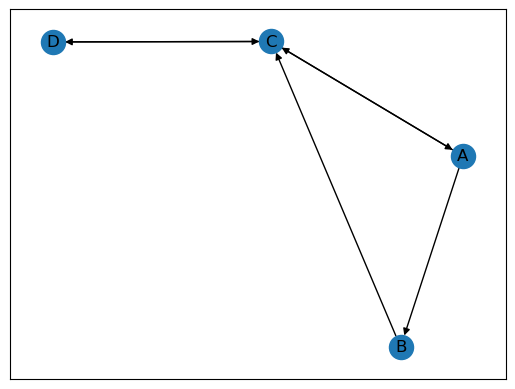

In [22]:
G = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.DiGraph)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
_ = nx.draw_networkx_edges(G, pos, width=1, arrows=True)

## Networks are everywhere

<img  align="right" src="Images/technology_examples.png" height=35% width=35%/>

<ul class=space_list>
    <li style="font-size:1.4em;color:blue"> <b> Technology </b></li>
        <ul>
            <li> WWW </li>
            <li> Utilities </li>
            <li> Supply chains </li>
        </ul>
    <li style="font-size:1.4em;"> Economy </li>
    <li style="font-size:1.4em;"> People </li>
    <li style="font-size:1.4em;"> Biology </li>
    <li style="font-size:1.4em;"> Culture </li> 
</ul>

## Networks are everywhere

<img  align="right" src="Images/economy_example.png" height=30% width=35%/>

<ul class=space_list>
    <li style="font-size:1.4em;"> Technology </li>
    <li style="font-size:1.4em;color:blue"> <b>Economy </b> </li>
    <ul>
            <li> International Trade </li>
            <li> Payments </li>
        </ul>
    <li style="font-size:1.4em;"> People </li>
    <li style="font-size:1.4em;"> Biology </li>
    <li style="font-size:1.4em;"> Culture </li> 
</ul>

## Networks are everywhere

<img  align="right" src="Images/people_example.png" height=35% width=35%/>

<ul class=space_list>
    <li style="font-size:1.4em;"> Technology </li>
    <li style="font-size:1.4em"> Economy </li>
    <li style="font-size:1.4em;color:blue"> <b> People </b></li>
    <ul>
        <li> E-mail </li>
        <li> Social networks </li>
        <li> Friends and family </li>
    </ul>
    <li style="font-size:1.4em;"> Biology </li>
    <li style="font-size:1.4em;"> Culture </li> 
</ul>

## Networks are everywhere

<img  align="right" src="Images/biology_example.png" height=35% width=35%/>

<ul class=space_list>
    <li style="font-size:1.4em;"> Technology </li>
    <li style="font-size:1.4em"> Economy </li>
    <li style="font-size:1.4em;"> People </li>
    <li style="font-size:1.4em;color:blue"> <b> Biology </b> </li>
    <ul>
        <li> Brain </li>
        <li> Food web </li>
        <li> Genes </li>
    </ul>
    <li style="font-size:1.4em;"> Culture </li> 
</ul>

## Networks are everywhere

<img  align="right" src="Images/culture_example.png" height=35% width=35%/>

<ul class=space_list>
    <li style="font-size:1.4em;"> Technology </li>
    <li style="font-size:1.4em"> Economy </li>
    <li style="font-size:1.4em;"> People </li>
    <li style="font-size:1.4em;"> Biology </li>
    <li style="font-size:1.4em;color:blue"> <b> Culture </b>  </li> 
    <ul>
        <li> Actor - Movie </li>
        <li> Lineages </li>
    </ul>
</ul>

## Some real world examples of networks

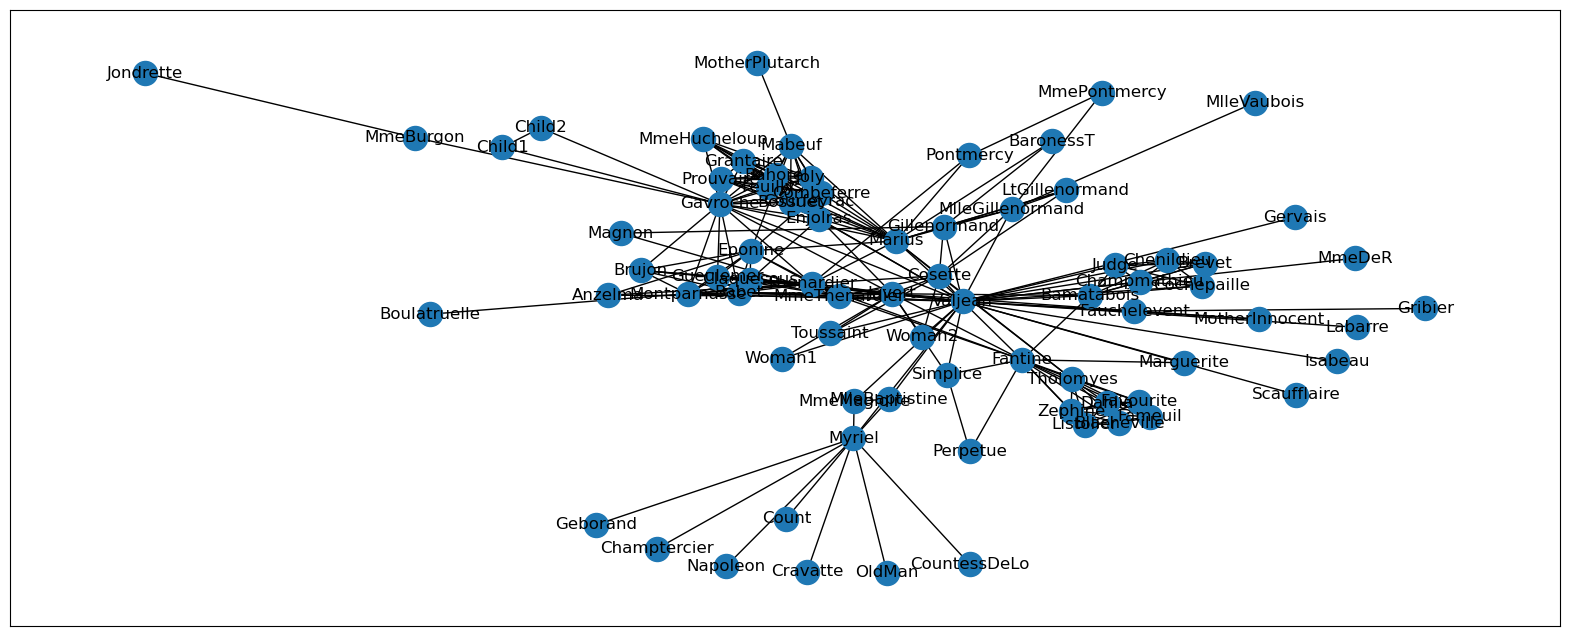

In [23]:
# networkx built in graphs

G = nx.les_miserables_graph()

plt.figure(figsize=(20, 8))
nx.draw_networkx(G)

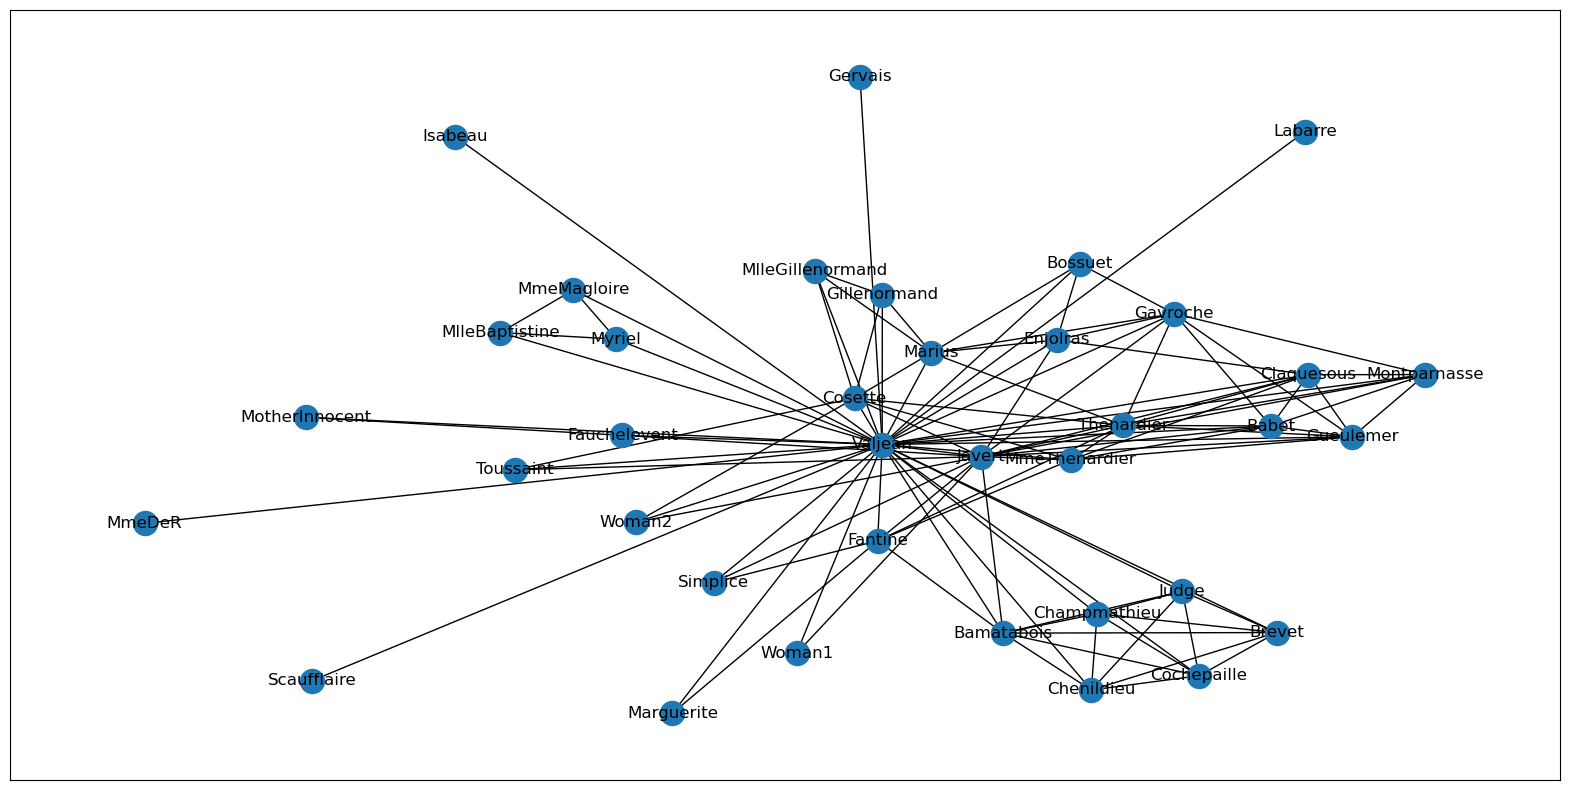

In [24]:
H = nx.subgraph(G, ["Valjean"] + list(nx.neighbors(G, 'Valjean')))
plt.figure(figsize=(20, 10))
nx.draw_networkx(H)

In [ ]:
# using the X API
# unfortunately, the free plan only allows 1 (!) request per day anymore ...
from pytwitter import Api
api = Api(bearer_token="XXX")
api.get_users(ids=["783214", "2244994945"])

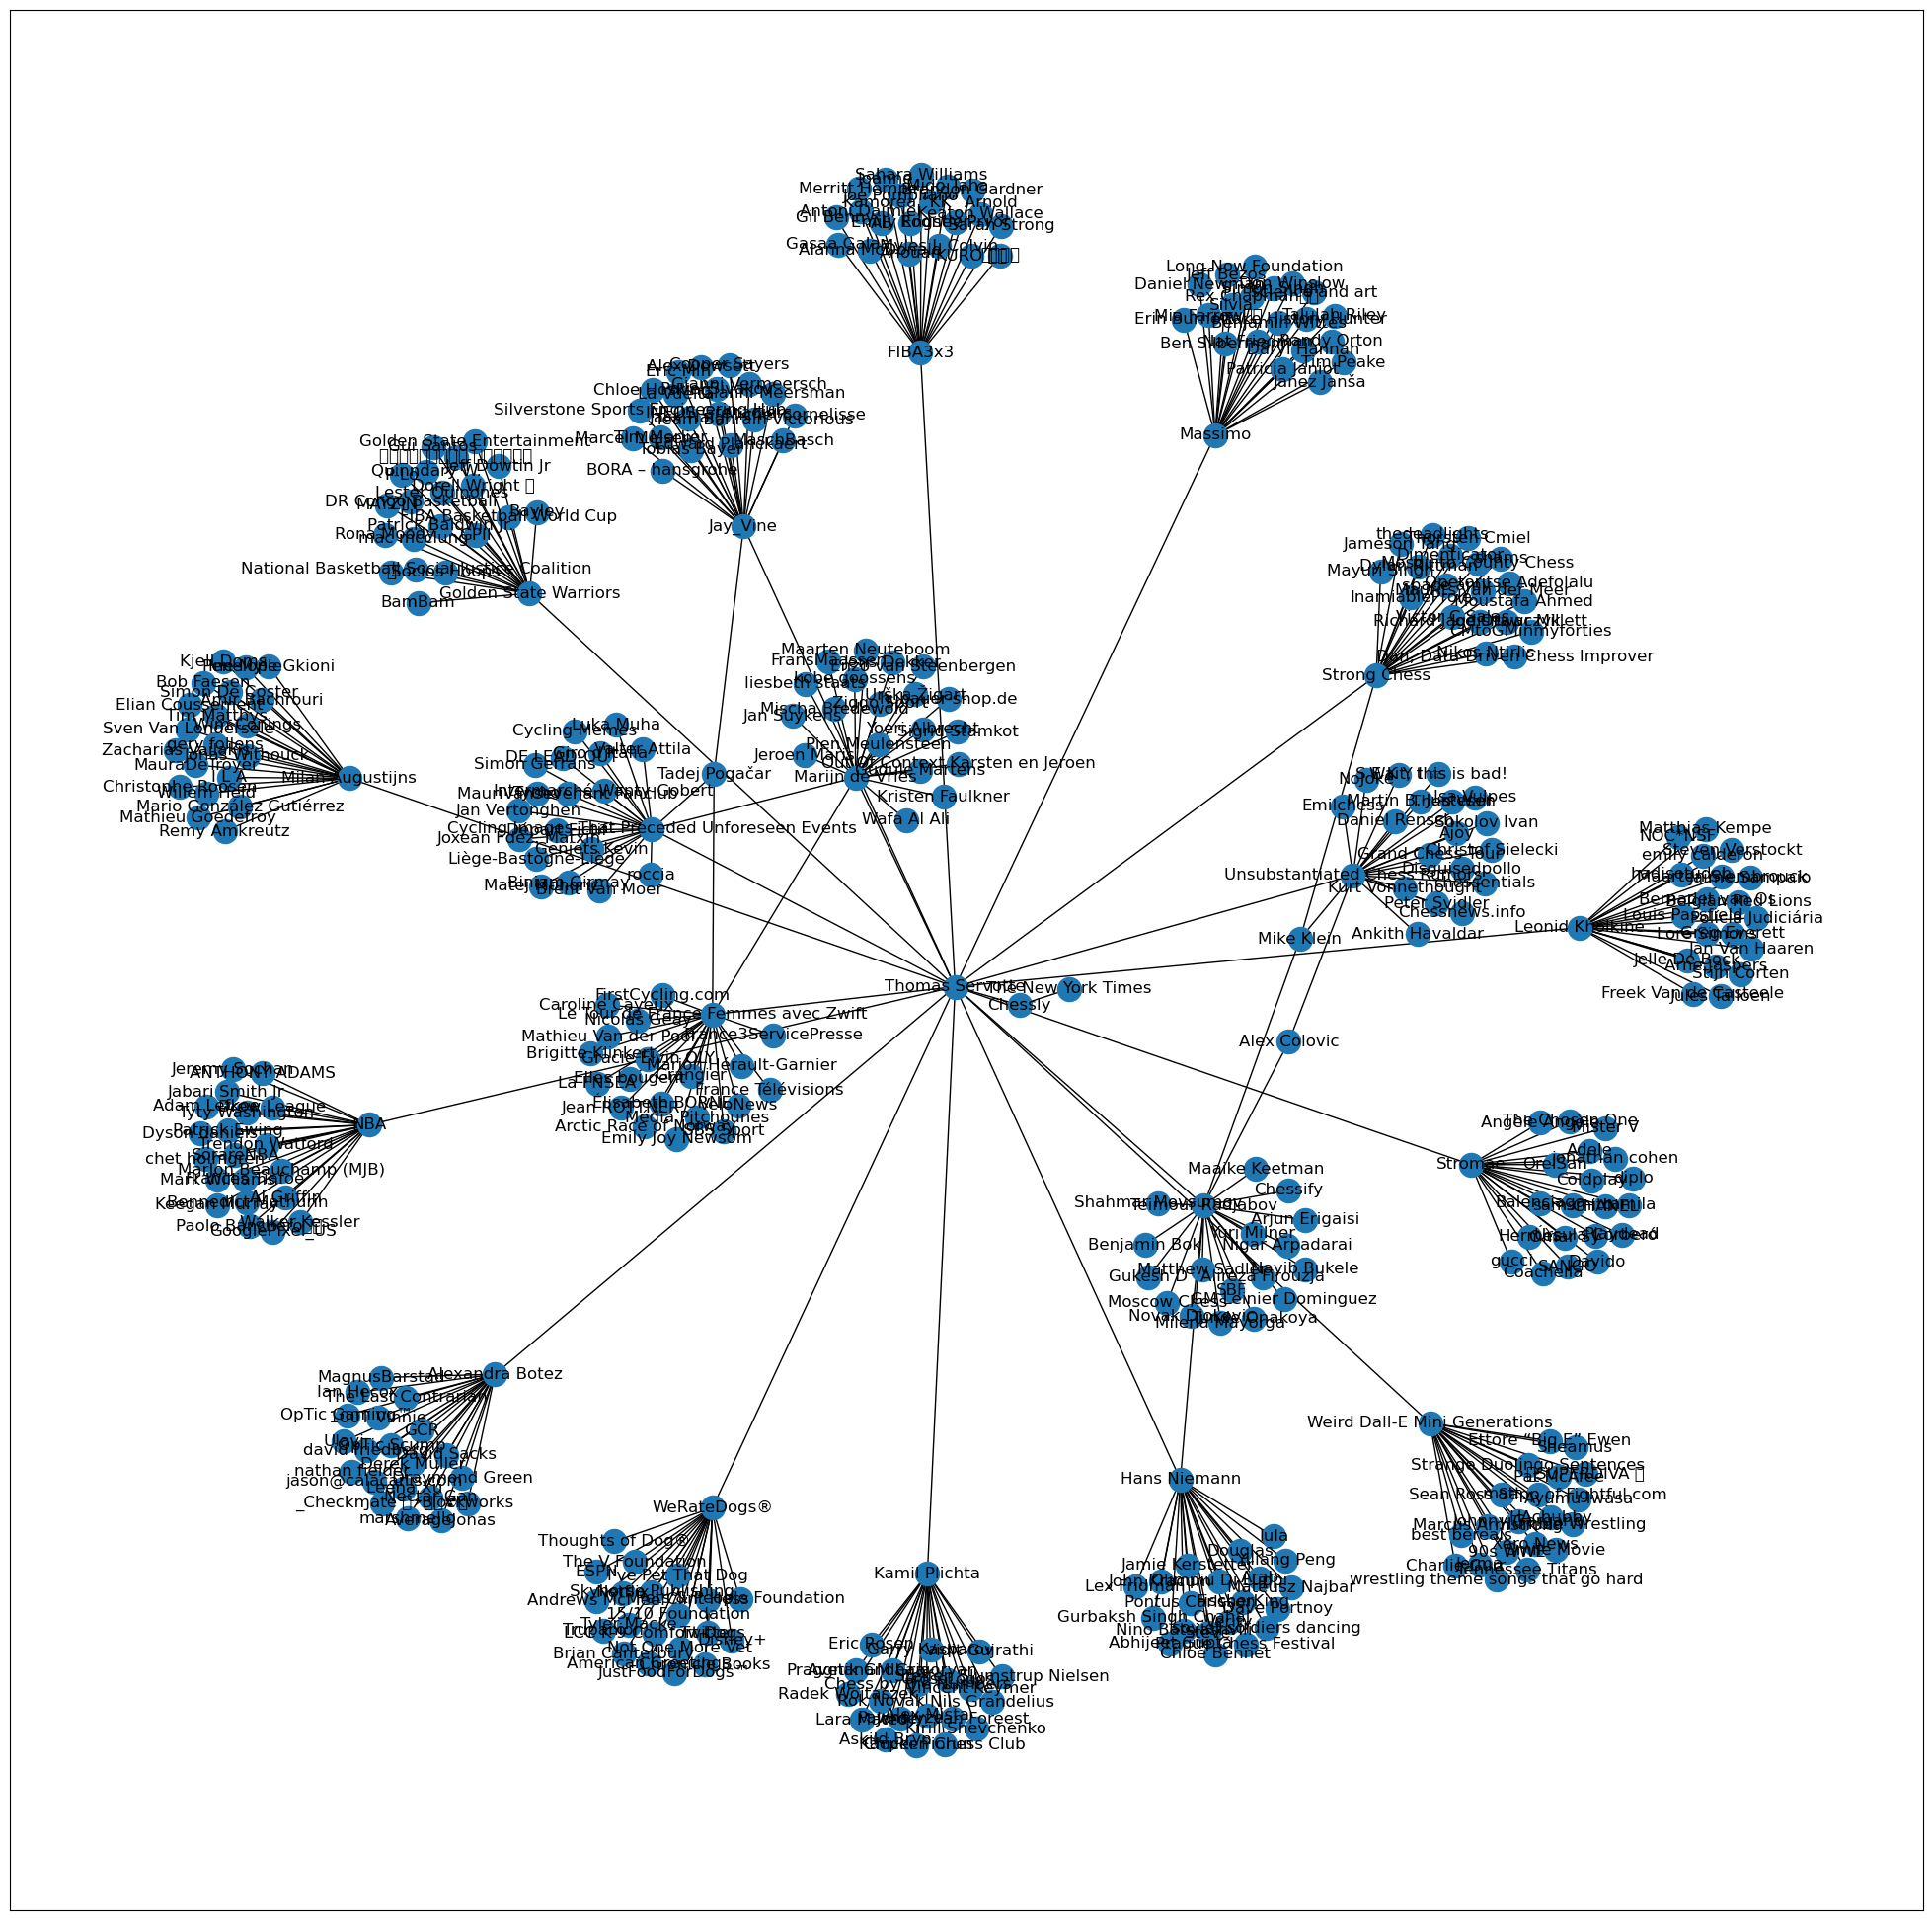

In [27]:
import warnings
warnings.filterwarnings("ignore")

edge_list = pd.read_csv('./twitter_edges.csv')

G = nx.from_edgelist(edge_list.to_records(index=False))
plt.figure(figsize=(25, 25))
nx.draw_networkx(G)

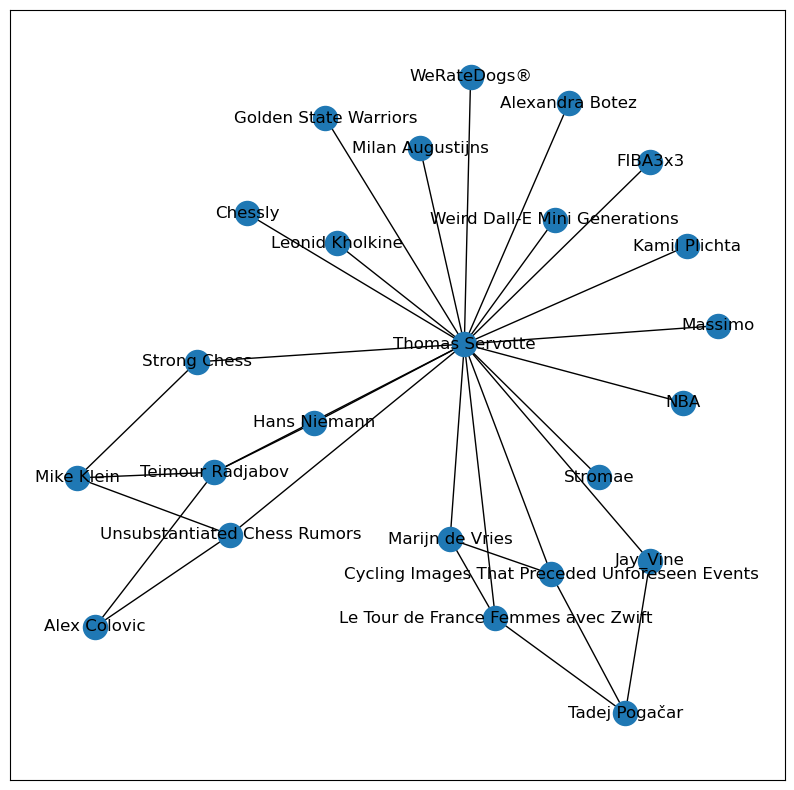

In [28]:
degree = G.degree()
G_sub = nx.subgraph_view(G, filter_node=lambda node: degree[node] > 1)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G_sub)

## Describing a network

<img  align="right" src="Images/components.png" height=35% width=35%/>
<img  align="right" src="Images/clustering_coefficient.png" height=35% width=35%/>

- **Size**: Number of nodes in a network
- **Density**: Proportion of observed ties to maximum ties ($\frac{2L}{k*(k-1)}$)
- **Components**: subgroups with all nodes connected
- **Diameter**: Degree of compactness, longest of all shortest paths
- **Clustering coefficient**: Percentage of closed triangles over all open and closed triangles

## Node importance

<img  align="right" src="Images/top_influencers.png" height=35% width=35%/>


Some nodes are more important than others
- Highly connected 
- Nodes that bridge communities


E.g. trade or airline hubs, social media influencers, deep-sea glass fiber cables, ...




_<span style="font-size: 0.7em">Image source: https://www.timebulletin.com/top-20-instagram-influencers-in-world-2022-based-on-authentic-followers-engagement/</span>_

## Node importance

<img  align="right" src="Images/centrality.png" height=35% width=35%/>

- Person with most connections?
    - &rarr; **Degree** centrality
    
- Person on average closest to everyone?
    - &rarr; **Closeness** centrality
    - $C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$
    
- Person connecting communities
    - &rarr; **Betweenness** centrality
    - $c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$
    
- Person with the most influence?
    - &rarr; **Eigenvector** centrality (aka **prestige** score)
    - $x_v = \frac{1}{\lambda}\sum_{t \in V} a_{v, t} x_t <=> Ax = \lambda x$
    - E.g. Google PageRank
    

## How can we find the most important nodes?

In [29]:
# let's load a new network
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from scipy.io import mmread

# see https://networkrepository.com/soc-dolphins.php
url = 'https://nrvis.com/download/data/soc/soc-dolphins.zip'

resp = urlopen(url)
ZipFile(BytesIO(resp.read())).extractall('/tmp/dolphine')
adjacency_matrix = mmread('/tmp/dolphine/soc-dolphins.mtx')

G = nx.from_numpy_array(adjacency_matrix.toarray())

print(G)

Graph with 62 nodes and 159 edges


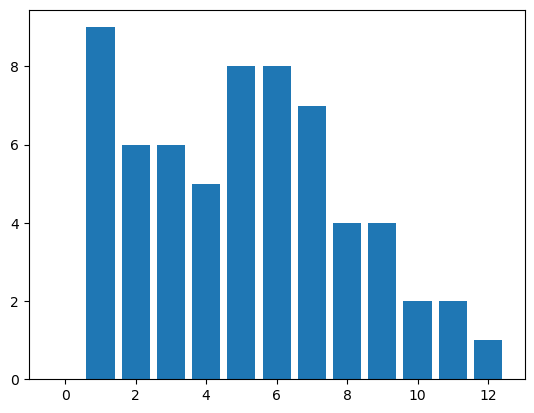

In [32]:
# degree
degrees = nx.degree_histogram(G)
_ = plt.bar(x=range(len(degrees)), height=degrees)

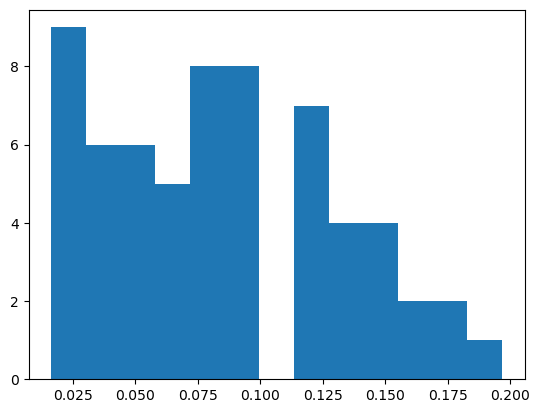

In [33]:
degree_centrality = nx.degree_centrality(G)

_ = plt.hist(degree_centrality.values(), bins=len(degrees))

# why is this not the same as above?

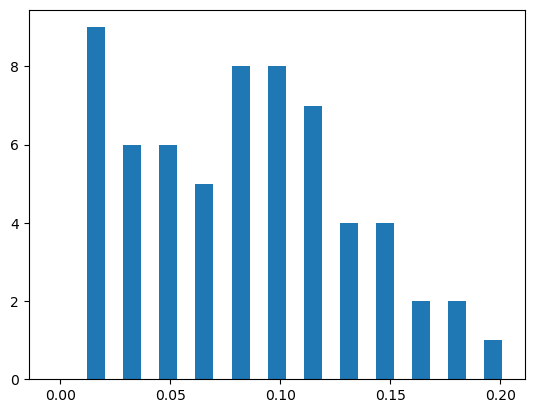

In [34]:
import numpy as np
normalized_degree = np.arange(0, len(degrees), 1) / (len(G.nodes()) - 1)
_ = plt.bar(x=normalized_degree, height=degrees, width=normalized_degree[1] / 2)

In [36]:
# betweenness
betweenness = nx.betweenness_centrality(G)
sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]

[(36, 0.24823719602893804),
 (1, 0.21332443553281097),
 (40, 0.1431495183426175),
 (37, 0.13856978865859435),
 (7, 0.11823861926938342),
 (17, 0.11430016291546972),
 (20, 0.10264573972090968),
 (54, 0.0991216467635194),
 (51, 0.08467725475022557),
 (57, 0.08420468343495603)]

In [37]:
# closeness
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:10]

[(36, 0.4178082191780822),
 (40, 0.40397350993377484),
 (37, 0.39869281045751637),
 (20, 0.391025641025641),
 (14, 0.3765432098765432),
 (1, 0.3719512195121951),
 (7, 0.3652694610778443),
 (28, 0.3652694610778443),
 (33, 0.3652694610778443),
 (8, 0.3630952380952381)]

In [38]:
# eigenvector
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda item: item[1], reverse=True)[:10]

[(14, 0.3157810764804676),
 (37, 0.3005609284704956),
 (45, 0.28500310473240437),
 (33, 0.2810970171605869),
 (50, 0.21769051331081501),
 (29, 0.2117610946447422),
 (51, 0.21068020892089812),
 (16, 0.20799316926734235),
 (40, 0.20787263130203706),
 (21, 0.20734961722376988)]

In [39]:
# Do the same dolphins rank high for closeness, betweenness and degree?

centrality = pd.DataFrame(
    {
        'degree': degree_centrality.values(),
        'betweenness': betweenness.values(),
        'closeness': closeness.values(),
        'eigenvector': eigenvector.values()
    },
    index=degree_centrality.keys()
)

display(centrality.sort_values('degree', ascending=False).head())
display(centrality.sort_values('betweenness', ascending=False).head())
display(centrality.sort_values('closeness', ascending=False).head())
display(centrality.sort_values('eigenvector', ascending=False).head())


degree  betweenness  closeness  eigenvector
14  0.196721     0.061972   0.376543     0.315781
37  0.180328     0.138570   0.398693     0.300561
45  0.180328     0.040670   0.346591     0.285003
33  0.163934     0.057166   0.365269     0.281097
51  0.163934     0.084677   0.329730     0.210680

degree  betweenness  closeness  eigenvector
36  0.114754     0.248237   0.417808     0.132766
1   0.131148     0.213324   0.371951     0.042091
40  0.131148     0.143150   0.403974     0.207873
37  0.180328     0.138570   0.398693     0.300561
7   0.081967     0.118239   0.365269     0.042908

degree  betweenness  closeness  eigenvector
36  0.114754     0.248237   0.417808     0.132766
40  0.131148     0.143150   0.403974     0.207873
37  0.180328     0.138570   0.398693     0.300561
20  0.147541     0.102646   0.391026     0.184478
14  0.196721     0.061972   0.376543     0.315781

degree  betweenness  closeness  eigenvector
14  0.196721     0.061972   0.376543     0.315781
37  0.180328     0.138570   0.398693     0.300561
45  0.180328     0.040670   0.346591     0.285003
33  0.163934     0.057166   0.365269     0.281097
50  0.114754     0.033411   0.350575     0.217691

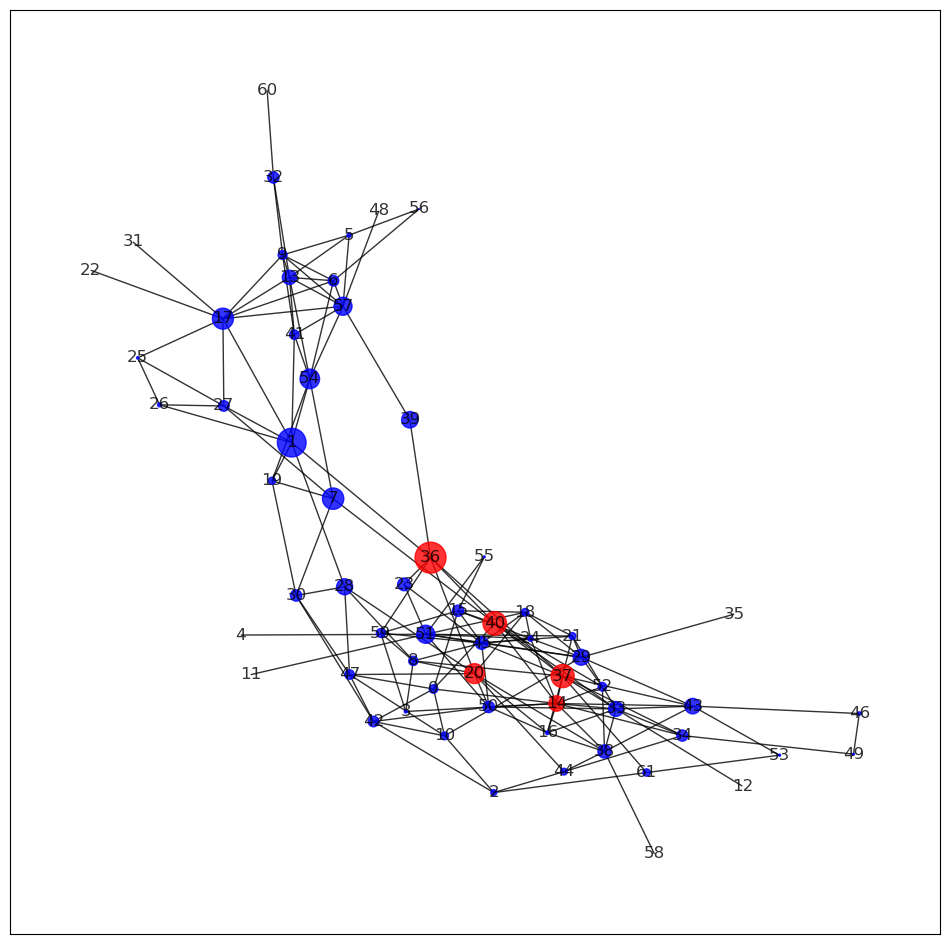

In [40]:
import pylab as plt
node_size = np.array(list(betweenness.values())) * 2000

node_color = [
    'red' if node in centrality.sort_values('closeness', ascending=False).iloc[:5].index.values
    else 'blue'
    for node in range(len(G.nodes))
]

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, node_size=node_size, node_color=node_color, alpha=0.8)

## Network structure

- Connections in a network are not random
- Some nodes are more likely to be connected to each other than others
    - Geographically closer, similar nodes, ...
- Large-scale as well as small scale
    - e.g. network of call interactions

## Network structure

<img  align="right" src="Images/network_structure.png" height=35% width=35%/>

- **Community** structure
    - Many intragroup links
    - Little intergroup links
    - E.g. (polarized) social groups
    
- **Core-periphery** structure
    - Densely connected core
    - Sparsely connected periphery
    - E.g. international trade, airline network

## Network structure: Small world

- A small-world network is a type of graph in which most nodes are not neighbors of one another, but most nodes can be reached from every other by a small number of hops.
- L (the number of hops) ~ log(#nodes in the network)
- Examples:
    – Food chains
    - Power grids
    - Brain
    - Voter networks

<img  align="middle" src="Images/small_world.png" height=70% width=70%/>

## Network structure - example

<img  align="center" src="Images/usa_blog_followers.png" height=50% width=50%/>
Blog followers 2004 elections - Democrat vs Republicans - Ladamic

## Network structure - Communities

#### Two ways to define communities
- Based on only strong internal ties
    - ==> Social cohesion (cliques, k-cores)
- Based on strong internal ties AND weak external ties
    - ==> Community detection

## Network structure - community detection

Many algorithms exists, e.g.
- **Girvan Newman**
    -  progressively remove edges from the original network using 'edge betweenness'
- **Kernighan-Lin algorithm**
    - partition G into two disjoint subsets A and B of equal (or nearly equal) size, in a way that minimizes the sum T of the weights of the subset of edges that cross from A to B
- **Spectral Clustering**
    - spectrum (eigenvalues) of the Graph Laplacian (see https://towardsdatascience.com/spectral-clustering-aba2640c0d5b)
- **Label propagation**
    - Every node is initialized with a unique label, then each node is assigned the majority label of its neighbors in ramdom order
- **Modularity Optimization**
- ...

## Network structure - community detection

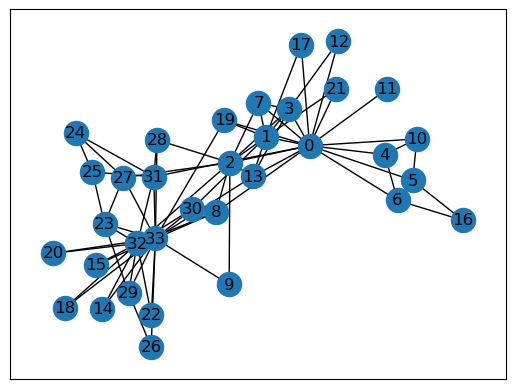

In [43]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

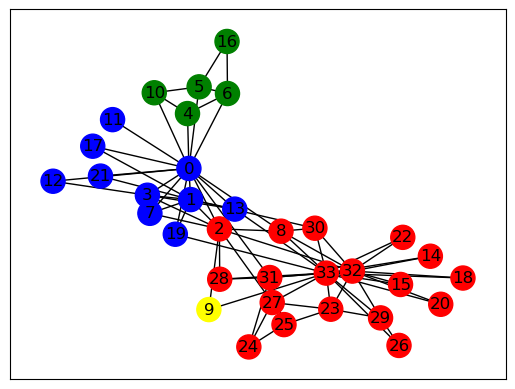

In [44]:
from networkx.algorithms import community
import itertools

communities_generator = community.girvan_newman(G)
communities = next(itertools.islice(communities_generator, 2 , None))


node_to_community = {node: comm for comm, nodelist in enumerate(communities) for node in nodelist}
community_to_color = dict(zip(range(len(communities)), ['blue','red', 'green', 'yellow']))
node_colors = [community_to_color[node_to_community[node]] for node in range(len(G.nodes))]

np.random.seed(1)
nx.draw_networkx(G, node_color=node_colors)

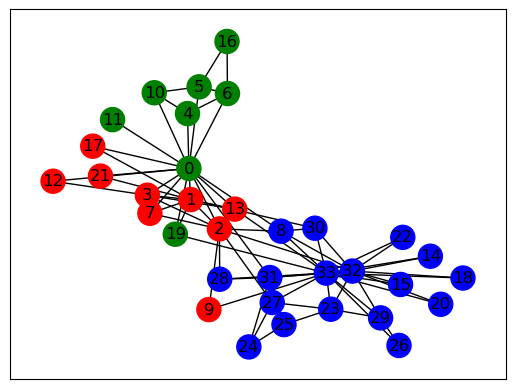

In [45]:
communities = community.greedy_modularity_communities(G)

node_to_community = {node: comm for comm, nodelist in enumerate(communities) for node in nodelist}
community_to_color = dict(zip(range(len(communities)), ['blue','red', 'green', 'yellow']))
node_colors = [community_to_color[node_to_community[node]] for node in range(len(G.nodes))]

np.random.seed(1)
nx.draw_networkx(G, node_color=node_colors)

## Things spread on networks

<img  align="right" src="Images/virus.png" height=35% width=35%/>

Ideas, gossip, deseases, ...


Factors that influence spread:
- Structure
- Node source
- Transmission speed

## Desease spread

In [46]:
# A very naive model
import matplotlib.animation as animation
import random
random.seed(42)

number_of_people = 100
average_connections_per_person = 4
infection_probability = 0.1
patient_zero = 72
patients = {patient_zero}


G = nx.gnm_random_graph(
    number_of_people, average_connections_per_person * number_of_people,
    seed=42,
    directed=False
)
pos = nx.spring_layout(G)

def update_infected():
    new_infected = set()
    for infected in patients:
        for contact in nx.neighbors(G, infected):
            if random.random() >= (1 - infection_probability):
                new_infected.add(contact)
    patients.update(new_infected)

<IPython.core.display.Javascript object>


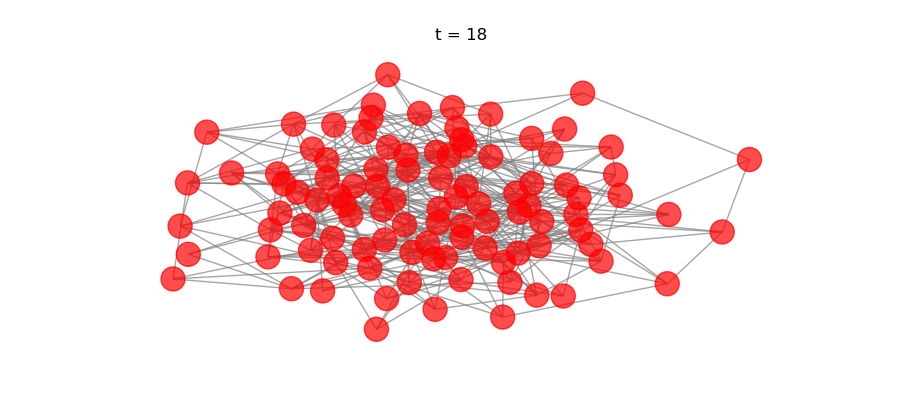

In [38]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
def update(timestep):
    if timestep == 0:
        patients.clear()
        patients.add(patient_zero)
    ax.clear()
    ax.set_title(f't = {timestep}')
    update_infected()
    node_color = ['red' if node in patients else 'blue' for node in G.nodes()]
    nx.draw(G, pos=pos, ax=ax, node_color=node_color, alpha=0.7, edge_color='grey')

ani = animation.FuncAnimation(fig, update, frames=20, interval=1000)

##  SIR model

In [47]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from collections import Counter

# Network topology
n = 200
k = 3
G = nx.gnm_random_graph(n, n* k,seed=42, directed=False)
pos = nx.spring_layout(G)

# Model selection
model = ep.SIRModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection probability
cfg.add_model_parameter('gamma', 0.005) # probability of recovering
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

color_map = {0: 'blue', 1: 'red', 2: 'green'}

<IPython.core.display.Javascript object>


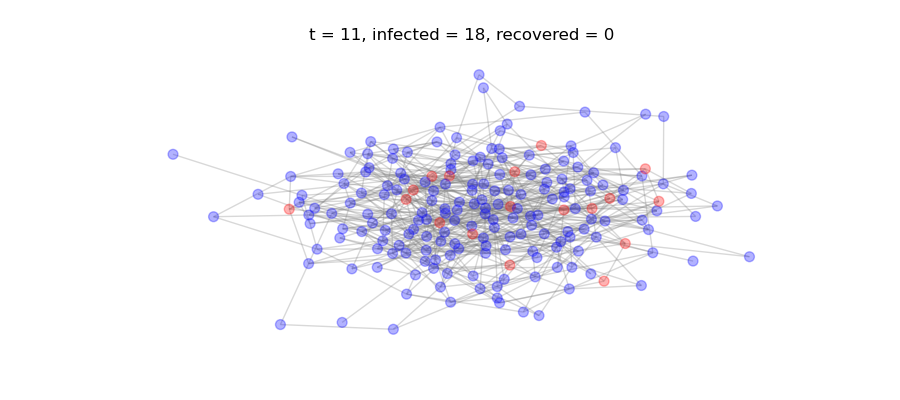

In [50]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
def update(timestep):
    if timestep == 0:
        model.reset()
    ax.clear()
    model.iteration()
    status_count = Counter(model.status.values())
    ax.set_title(f't = {timestep}, infected = {status_count.get(1, 0)}, recovered = {status_count.get(2, 0)}')
    node_color = [color_map[model.status[node]] for node in G.nodes()]
    nx.draw(G, pos=pos, ax=ax, node_color=node_color, alpha=0.3, node_size=50, edge_color='grey')

ani = animation.FuncAnimation(fig, update, frames=500, interval=100)

## Networks and predictive modelling

<img  align="center" src="Images/predictive_modelling.png" height=50% width=50%/>

## Network features

<img  align="right" src="Images/openthebox.png" height=50% width=50%/>

Subjects are not isolated

They are influenced by peers through interaction

They are embedded in a network

Only works for **tangible** networks


_<span style="font-size: 0.7em">image source: https://openthebox.be/search</span>_

## Link prediction

<table><tr>
<td> <img src="Images/link_prediction.png" style="width: 100%;"/> </td>
<td> <img src="Images/facebook_suggestions.png" style="width: 100%;"/> </td>
<td> <img src="Images/linkedin_suggestions.png" style="width: 100%;"/> </td>
</tr></table>

## Link prediction - exercise

In [51]:
# see https://networkrepository.com/fb-pages-food.php
url = 'https://nrvis.com/download/data/soc/fb-pages-food.zip'

resp = urlopen(url)
ZipFile(BytesIO(resp.read())).extractall('/tmp/facebook')
nodes = pd.read_csv('/tmp/facebook/fb-pages-food.nodes')
edges = pd.read_csv('/tmp/facebook/fb-pages-food.edges', header=None, names=['from', 'to'])

len(nodes), len(edges)

(620, 2102)

In [42]:
nodes.head()

id                     name  new_id
0  402449106435352               Josh Marks     386
1     368969274888  Blue Ribbon Restaurants     473
2  765596333518863                Pat Neely       1
3  136870209668885               La Griglia     542
4  840078802741859              Jose Garces     189

In [43]:
edges.head()

from   to
0     0  276
1     0   58
2     0  132
3     0  603
4     0  398

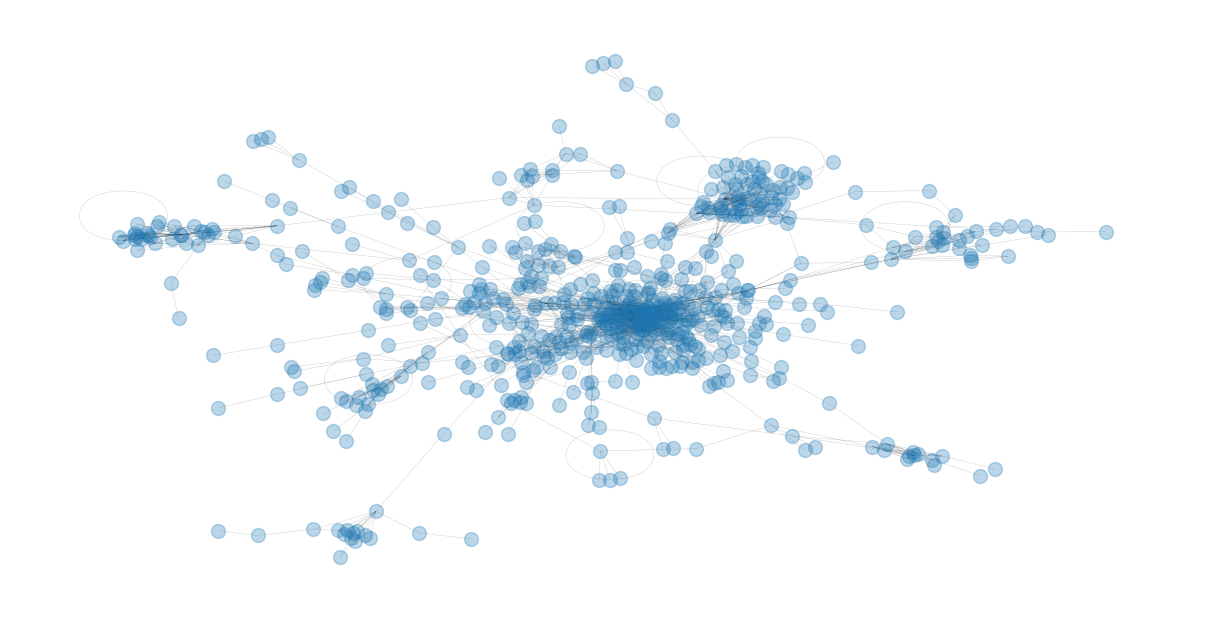

In [44]:
%matplotlib inline
G = nx.from_pandas_edgelist(edges, "from", "to", create_using=nx.Graph())

pos = nx.spring_layout(G, seed=23)
plt.figure(figsize=(12, 6))
nx.draw(G, with_labels=False,  pos = pos, node_size = 100, alpha = 0.3, width = 0.2)

## Unconnected nodes (negative samples)

In [47]:
# takes a while
from tqdm.auto import tqdm

n_nodes = len(G.nodes())
adj = nx.adjacency_matrix(G)
unconnected_pairs = pd.DataFrame(columns=['from', 'to'])

pbar1 = tqdm(range(n_nodes), position=0)
for row in pbar1:
    pbar2 = tqdm(range(row + 1, n_nodes), leave=False, position=1, display=False)
    for column in pbar2:
        if (nx.shortest_path_length(G, row, column) <= 2 and adj[row, column] == 0):
            unconnected_pairs = unconnected_pairs.append({'from': row, 'to': column}, ignore_index=True)

  0%|          | 0/620 [00:00<?, ?it/s]

In [48]:
len(unconnected_pairs)

19015

## Drop connected nodes (positive samples)

In [48]:
link_idx_to_remove = []
fb_edges_temp = edges.copy()

for i in tqdm(edges.index):
    # remove a node pair and build a new graph
    G_temp = nx.from_pandas_edgelist(
        fb_edges_temp.drop(index=i), "from", "to", create_using=nx.Graph()
    )
  
    # check there is no splitting of graph and number of nodes is same
    if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == n_nodes):
        link_idx_to_remove.append(i)
        fb_edges_temp = fb_edges_temp.drop(index=i)

  0%|          | 0/2102 [00:00<?, ?it/s]

In [49]:
len(link_idx_to_remove)

1483

## Prepare training data

In [50]:
data = unconnected_pairs.assign(target=0).append(edges.loc[link_idx_to_remove].assign(target=1)).reset_index(drop=True)
data.sample(5)

from   to  target
14429  307  480       0
16418  361  603       0
18863  576  588       0
7366   123  357       0
11148  208  568       0

In [51]:
data['target'].value_counts()

0    19015
1     1483
Name: target, dtype: int64

In [52]:
G_data = nx.from_pandas_edgelist(fb_edges_temp, "from", "to", create_using=nx.Graph())
len(G_data.nodes()), len(G_data.edges())

(620, 619)

## Feature engineering

In [53]:
degree = G_data.degree()
data['from_degree'] = data['from'].map(degree)
data['to_degree'] = data['to'].map(degree)
data['max_degree'] = data[['from_degree', 'to_degree']].max(axis=1)
data['min_degree'] = data[['from_degree', 'to_degree']].min(axis=1)

In [54]:
betweenness = nx.betweenness_centrality(G_data)
data['from_betweenness'] = data['from'].map(betweenness)
data['to_betweenness'] = data['to'].map(betweenness)
data['max_betweenness'] = data[['from_betweenness', 'to_betweenness']].max(axis=1)
data['min_betweenness'] = data[['from_betweenness', 'to_betweenness']].min(axis=1)

In [55]:
closeness = nx.closeness_centrality(G_data)
data['from_closeness'] = data['from'].map(closeness)
data['to_closeness'] = data['to'].map(closeness)
data['max_closeness'] = data[['from_closeness', 'to_closeness']].max(axis=1)
data['min_closeness'] = data[['from_closeness', 'to_closeness']].min(axis=1)

In [56]:
communities = community.girvan_newman(G_data)

c = next(itertools.islice(communities, 8, None))

data[[f'community_{i}' for i in range(10)]] = 0

for i, comm in enumerate(c):
    data.loc[data['from'].isin(comm) | data['to'].isin(comm), f'community_{i}'] = 1
 
data['same_community'] = (data[[f'community_{i}' for i in range(10)]].sum(axis=1) == 1).astype(int)

## Train test split

In [57]:
from sklearn.model_selection import train_test_split

num_features = [
  'min_closeness', 'max_closeness',
  'min_betweenness', 'max_betweenness',
  'min_degree', 'max_degree'
]

cat_features = [f'community_{i}' for i in range(10)] + ['same_community']

X_train, X_test, y_train, y_test = train_test_split(
    data[num_features + cat_features], data['target'], test_size=0.2, random_state=42
)

## Model

In [60]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    random_state=42,
    is_unbalance=True
)
model.fit(X_train[num_features + cat_features], y_train, categorical_feature=cat_features)

[LightGBM] [Info] Number of positive: 1203, number of negative: 15195
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073363 -> initscore=-2.536148
[LightGBM] [Info] Start training from score -2.536148


LGBMClassifier(is_unbalance=True, n_estimators=200, objective='binary',
               random_state=42)

## Evaluate

In [61]:
from sklearn.metrics import roc_auc_score

print('test score', roc_auc_score(y_test, model.predict_proba(X_test[num_features + cat_features])[:, 1]))

print('train score', roc_auc_score(y_train, model.predict_proba(X_train[num_features + cat_features])[:, 1]))

test score 0.71787397157816
train score 0.9209326141703983


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

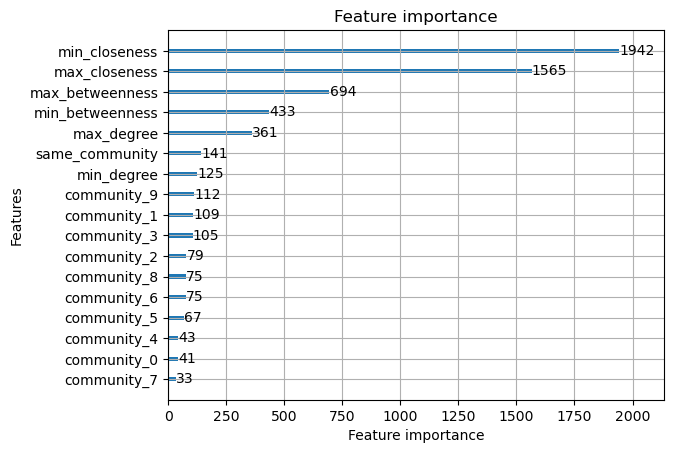

In [62]:
lgbm.plot_importance(model)

## Node2Vec

https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf

In [65]:
from node2vec import Node2Vec

node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50).fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/620 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:02<00:00, 23.55it/s]


In [66]:
node2vec.wv['0'].shape

(100,)

In [67]:
X_train_vec = np.array(
    [
        (node2vec.wv[str(row['from'])] + node2vec.wv[str(row['to'])])
        for _, row in data.loc[X_train.index].iterrows()
    ]
)
X_test_vec = np.array(
    [
        (node2vec.wv[str(row['from'])] + node2vec.wv[str(row['to'])])
        for _, row in data.loc[X_test.index].iterrows()
    ]
)

In [68]:
model = lgbm.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    random_state=42,
    colsample_bytree=0.5,
    subsample_freq=20,
    subsample=0.5,
    is_unbalance=True
)
model.fit(X_train_vec, y_train)

[LightGBM] [Info] Number of positive: 1203, number of negative: 15195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073363 -> initscore=-2.536148
[LightGBM] [Info] Start training from score -2.536148


LGBMClassifier(colsample_bytree=0.5, is_unbalance=True, n_estimators=200,
               objective='binary', random_state=42, subsample=0.5,
               subsample_freq=20)

In [69]:
print('test score', roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1]))

print('train score', roc_auc_score(y_train, model.predict_proba(X_train_vec)[:, 1]))

test score 0.6521101346297682
train score 0.9606225743089901


## Final exercise: movie network

In [176]:
import requests
import re
from bs4 import BeautifulSoup

url = "https://www.imdb.com/name/nm0634240/"  # IMDb URL for example person
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')
# Example: Extract person's filmography
filmography = [
    next(item.children) for item in 
    soup.find_all("div", class_="ipc-metadata-list-summary-item__tc") 
    if 'Director' in item.text and not 'Untitled' in item.text
]
filmography = [(i.text, int(i.get('href').split('/')[2].replace('tt', ''))) for i in filmography]

In [177]:
filmography

[('Oppenheimer', 15398776),
 ('Tenet', 6723592),
 ('Dunkirk', 5013056),
 ('Quay', 4907572),
 ('Interstellar', 816692),
 ('The Dark Knight Rises', 1345836),
 ('Inception', 1375666),
 ('The Dark Knight', 468569),
 ('The Prestige', 482571),
 ('Batman Begins', 372784),
 ('Insomnia', 278504),
 ('Memento', 209144),
 ('Following', 154506),
 ('Doodlebug', 411302),
 ('Larry Mahoney', 28642224)]

In [174]:
from imdb import Cinemagoer
cg = Cinemagoer()

In [180]:
from itertools import combinations
from collections import defaultdict, Counter
edgelist = []
for title, movie_id in filmography:
    print(title)
    m = cg.get_movie(movie_id)
    try:
        cast = [a['name'] for a in m['cast']]
    except KeyError:
        print('No cast available')
        continue
    edges_to_add = combinations(cast, 2)
    edgelist.extend(edges_to_add)

# make sure the order is fixed to avoid duplicate edges
edgelist = [tuple(sorted(pair)) for pair in edgelist]
weighted_edgelist = [tuple([*k, v]) for k, v in dict(Counter(edgelist)).items()]

Oppenheimer
Tenet
Dunkirk
Quay
Interstellar
The Dark Knight Rises
Inception
The Dark Knight
The Prestige
Batman Begins
Insomnia
Memento
Following
Doodlebug
Larry Mahoney
No cast available


In [181]:
import networkx as nx

movie_network = nx.Graph()
movie_network.add_weighted_edges_from(weighted_edgelist)

Who is the most important actor/actress?

In [182]:
sorted(movie_network.degree(weight='weight'), key=lambda x: x[1], reverse=True)[:10]

[('Michael Caine', 1190),
 ('Cillian Murphy', 1135),
 ('Gary Oldman', 961),
 ('Christian Bale', 873),
 ('Morgan Freeman', 812),
 ('Ernest Pierce', 812),
 ('John Nolan', 681),
 ('Nestor Carbonell', 661),
 ('Patrick Leahy', 661),
 ('Aaron Eckhart', 661)]

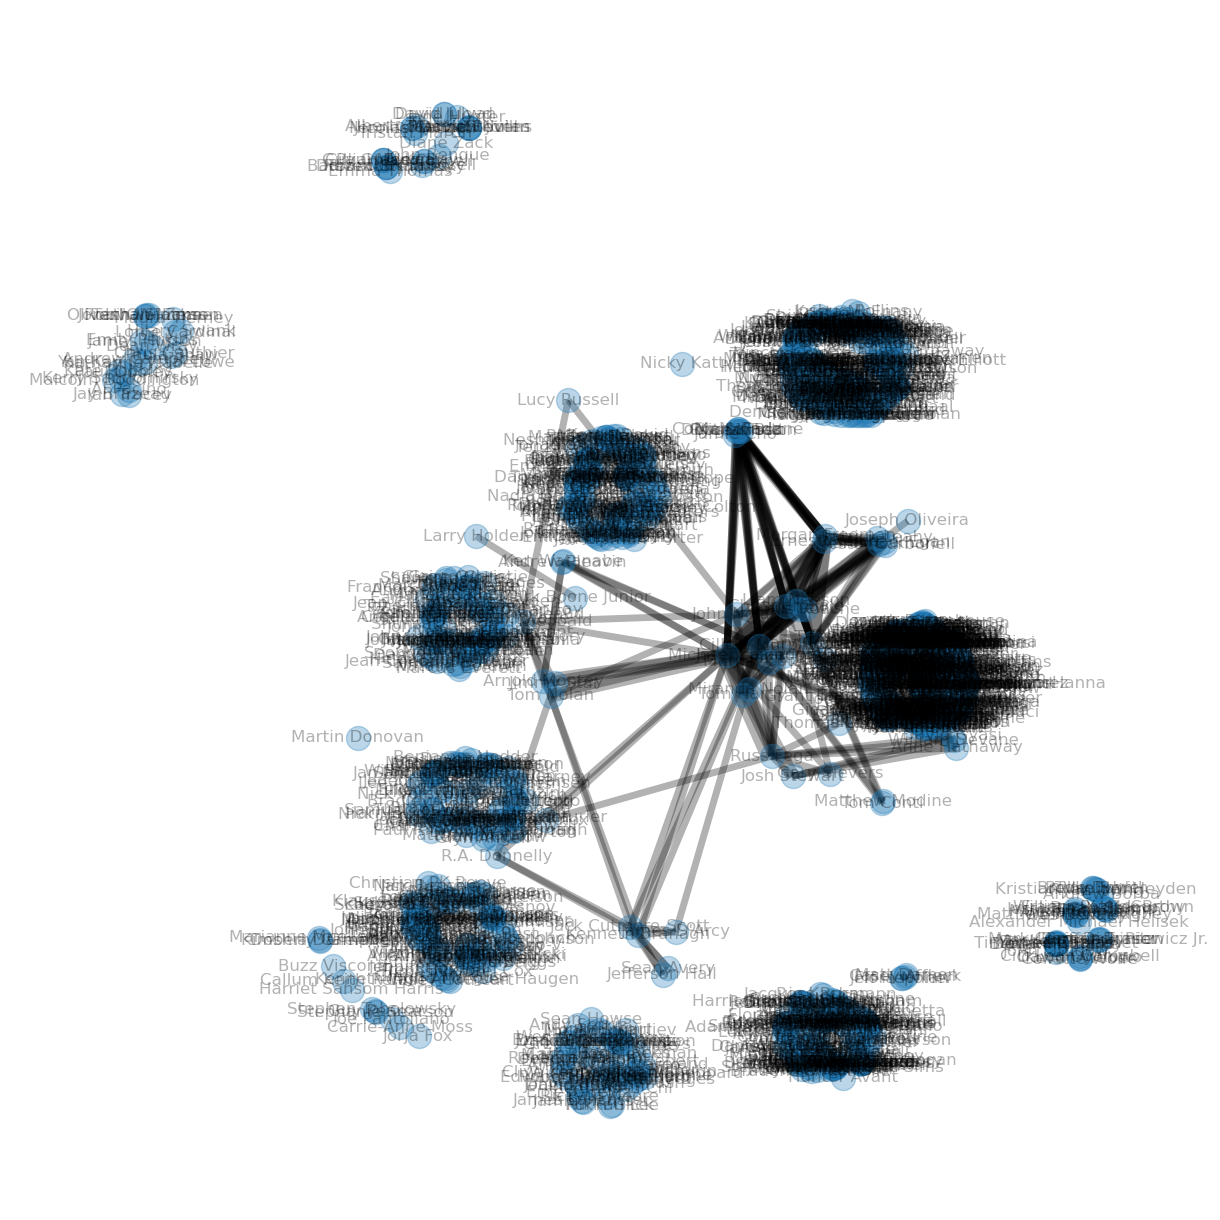

In [183]:
import pylab as plt

degree = movie_network.degree()
G = nx.subgraph_view(movie_network, filter_node=lambda node: degree[node] > 1)

weights = nx.get_edge_attributes(G, 'weight').values()
pos = nx.spring_layout(G)

plt.figure(figsize=(12,12)) 
nx.draw(
    G,
    pos, 
    width=(np.array(list(weights)) - 1) * 5,
    alpha=0.3,
    with_labels=True
)

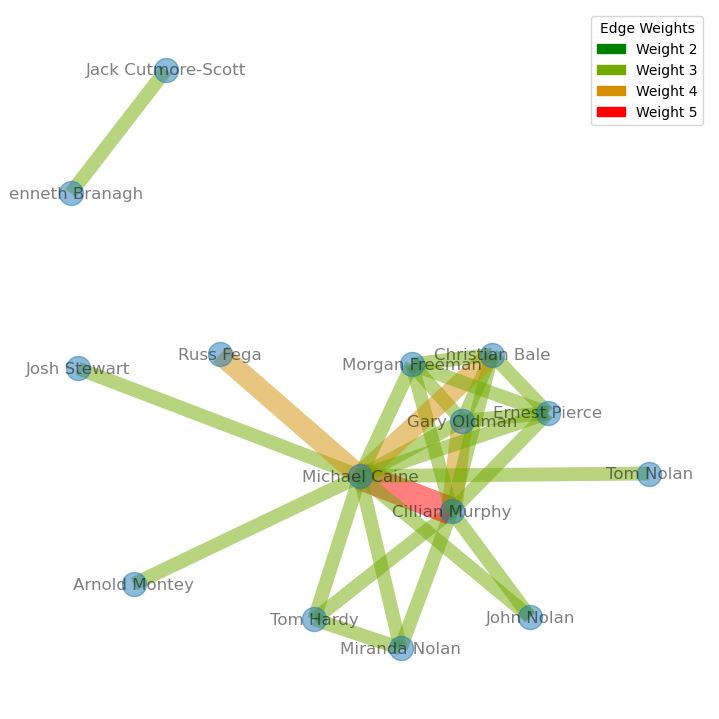

In [227]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from colour import Color
H = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['weight'] > 2))

pos = nx.spring_layout(H, k=1, seed=1)

weights = nx.get_edge_attributes(H, 'weight').values()
color_map = {i: c.get_rgb() for i, c in zip(range(2, 6), list(Color("green").range_to(Color("red"),4)))}

# Create the legend items from the color_map
legend_handles = [
    Patch(color=color_map[i], label=f"Weight {i}")
    for i in color_map.keys()
]

plt.figure(figsize=(7, 7)) 
nx.draw(
    H,
    pos, 
    width=(np.array(list(weights)) - 1) * 5,
    edge_color=[color_map[w] for w in weights],
    alpha=0.5,
    with_labels=True
)

# Add the legend to the plot
plt.legend(
    handles=legend_handles,
    title="Edge Weights",
    loc="upper right"
)
plt.show()
